# Newton's method for nonlinear functions of one variable

### Consider the function 
\begin{equation}
f(x) = (x-10)^3 + 3(x-10)^2 + 20.
\end{equation}
We wish to find the positive root where $f(x) = 0$.

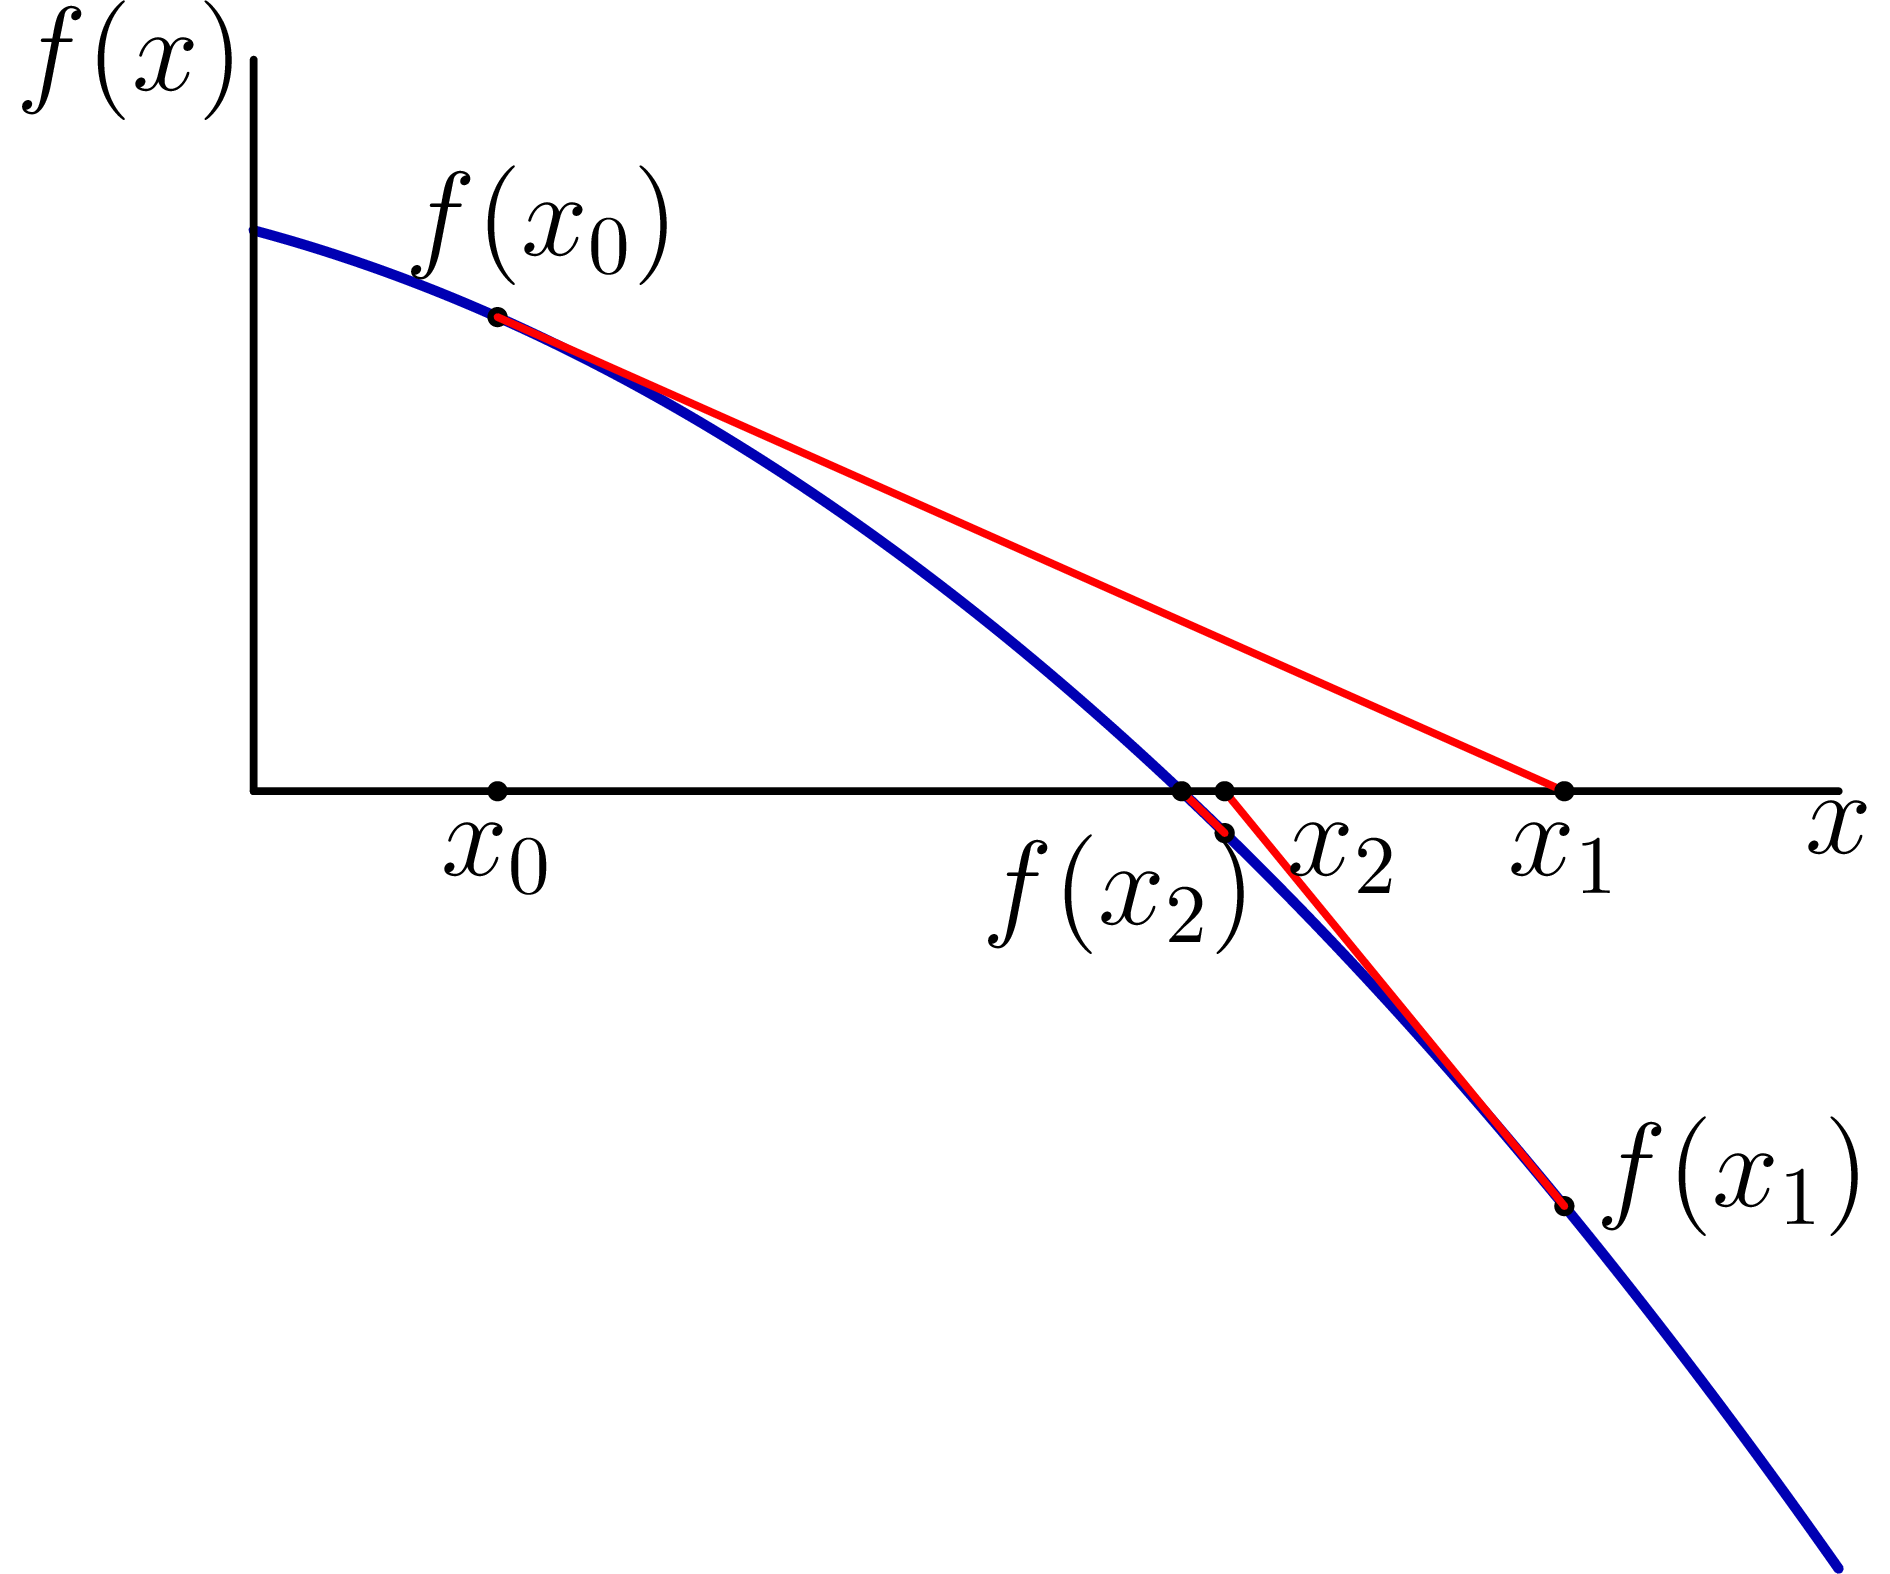

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x')

In [3]:
x

x

In [4]:
f = (x-10)**3 + 3*(x-10)**2 + 20

In [5]:
f

(x - 10)**3 + 3*(x - 10)**2 + 20

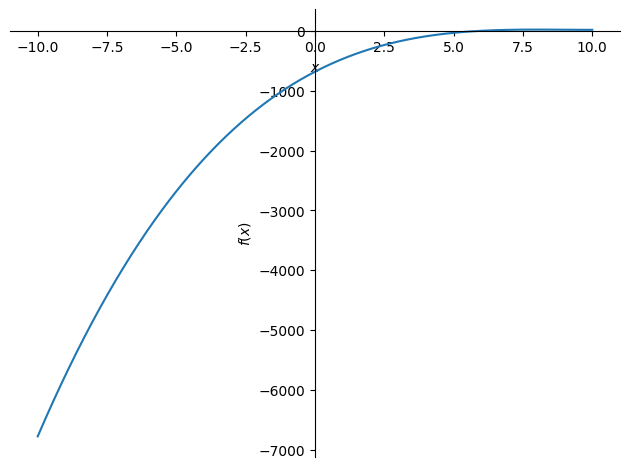

In [6]:
sp.plot(f)

In [7]:
# derive f'(x)
fp = sp.diff(f,x)
fp

6*x + 3*(x - 10)**2 - 60

### Newton’s Method Algorithm (Residual Tracking)

This code implements **Newton’s method** to approximate a root of a nonlinear equation  
\begin{equation}
f(x) = 0
\end{equation}
starting from an initial guess $x_0$. In addition to computing the iterates, the algorithm
stores the **residual** and **solution value** at each iteration so that convergence behavior
can be analyzed and plotted.

---

#### Initialization
- The initial guess is set to $ x_0 = 2.5 $.
- The maximum number of Newton iterations is fixed at `niter = 8`.
- Two empty lists are created:
  - `residual` to store $ |f(x_i)| $
  - `solution` to store the iterate values $ x_i $

---

#### Newton Iteration Loop
For each iteration \( i = 0, 1, \dots, niter-1 \):

1. **Evaluate the function**
   \begin{equation}
   f_i = f(x_i)
   \end{equation}
2. **Evaluate the derivative**
  \begin{equation}
   f'_i = f'(x_i)
   \end{equation}
3. **Compute the Newton update**
   \begin{equation}
   \Delta x_i = -\frac{f(x_i)}{f'(x_i)}
   \end{equation}
4. **Store convergence data**
   - The residual $ f(x_i) $ is saved
   - The current iterate $ x_i $ is saved
5. **Update the solution**
   \begin{equation}
   x_{i+1} = x_i + \Delta x_i
   \end{equation}

---

#### Post-processing
- The absolute values of the residual and solution arrays are taken to facilitate
  convergence plots.
- These arrays can be used to visualize convergence behavior using either linear
  or logarithmic plots.

---

In [8]:
# Begin Newton's method iterations (take initial guess x0 = 2.5)
xi = 2.5
niter = 8
residual = []
solution = []
for i in range(niter):
    fi = f.subs(x,xi).evalf()
    fpi = fp.subs(x,xi).evalf()
    dxi = -fi/fpi
    ri = fi
    residual.append(ri)
    solution.append(xi)
    xi = xi + dxi
residual = np.abs(residual)
solution = np.abs(solution)

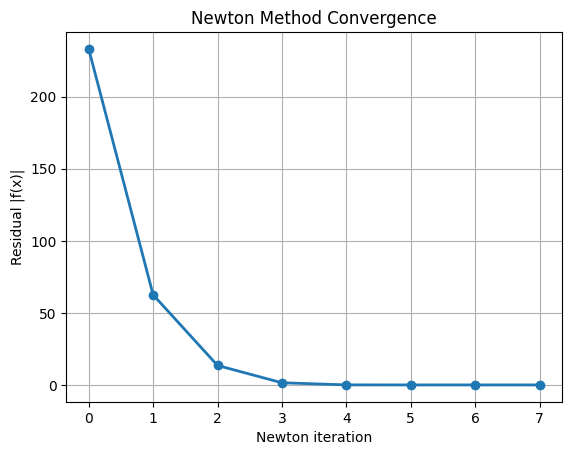

In [9]:
iters = np.arange(len(residual))
plt.plot(iters, residual, 'o-', linewidth=2)
plt.xlabel('Newton iteration')
plt.ylabel('Residual |f(x)|')
plt.title('Newton Method Convergence')
plt.grid(True, which='both')
plt.show()

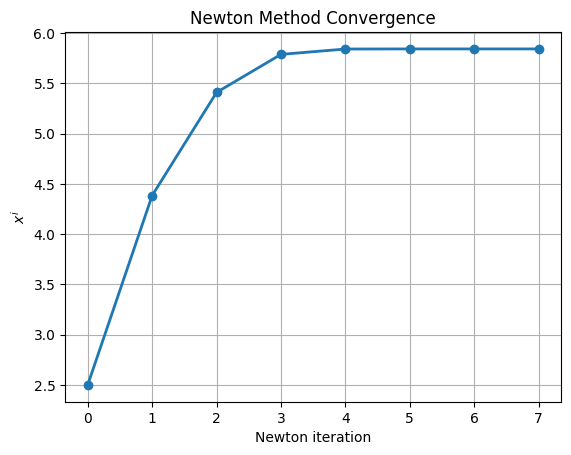

In [10]:
plt.plot(iters, solution, 'o-', linewidth=2)
plt.xlabel('Newton iteration')
plt.ylabel('$x^i$')
plt.title('Newton Method Convergence')
plt.grid(True, which='both')
plt.show()

#### Key Observations
- Newton’s method exhibits **quadratic convergence** once the iterate is sufficiently
  close to the root.
- Storing the residual at each iteration allows direct verification of convergence
  behavior.
- This structure cleanly separates **symbolic evaluation** (SymPy) from **numerical
  analysis** and plotting.

---